In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import mglearn
import numpy as np
import matplotlib.pyplot as plt

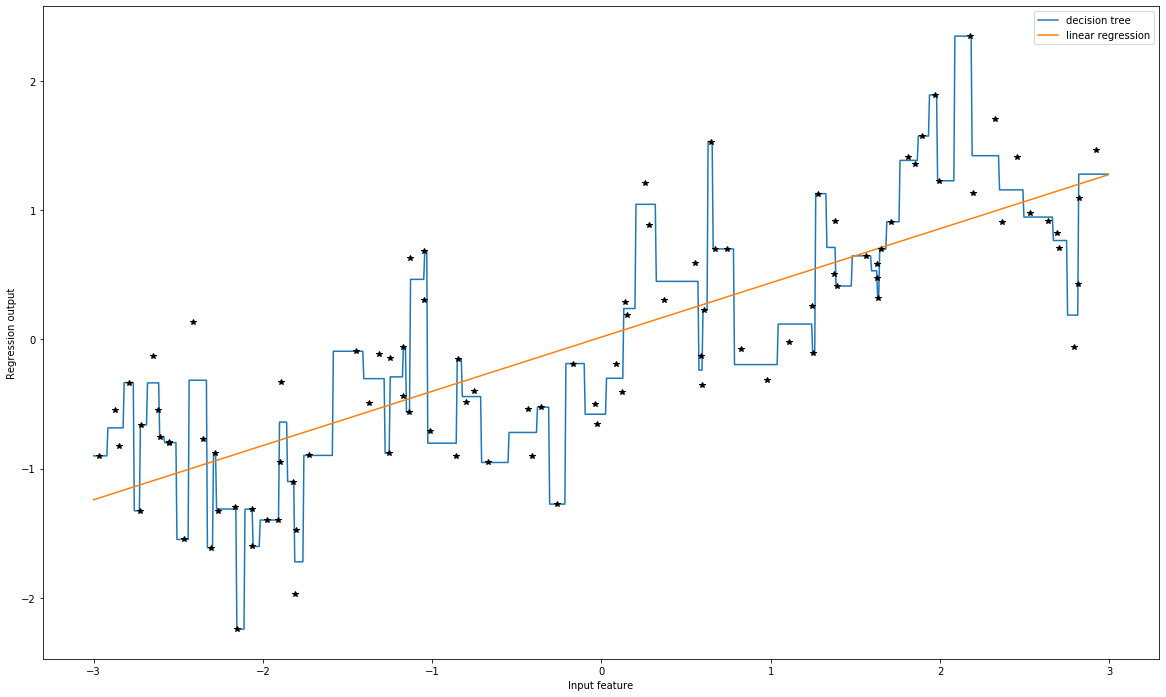

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
plt.figure(figsize=(20, 12))

tree = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, tree.predict(line), label='decision tree')

linreg = LinearRegression().fit(X, y)
plt.plot(line, linreg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, '*', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [4]:
# Binning (discretization) of feature -- > split it in multiple features -->
# --> make linear models more powerful on continuous data
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
which_bin = np.digitize(X, bins=bins)
print('First bins memberships:')
for n in range(5):
    print(bins[which_bin[n] - 1], '<=', X[n], '<', bins[which_bin[n]])

First bins memberships:
[-1.2] <= [-0.75275929] < [-0.6]
[2.4] <= [2.70428584] < [3.]
[1.2] <= [1.39196365] < [1.8]
[0.] <= [0.59195091] < [0.6]
[-2.4] <= [-2.06388816] < [-1.8]


In [6]:
# single continuous input feature --> categorical feature (which bin a data point is in)

encoder = OneHotEncoder(sparse=False, categories='auto')
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print('X_binned.shape: {}'.format(X_binned.shape))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

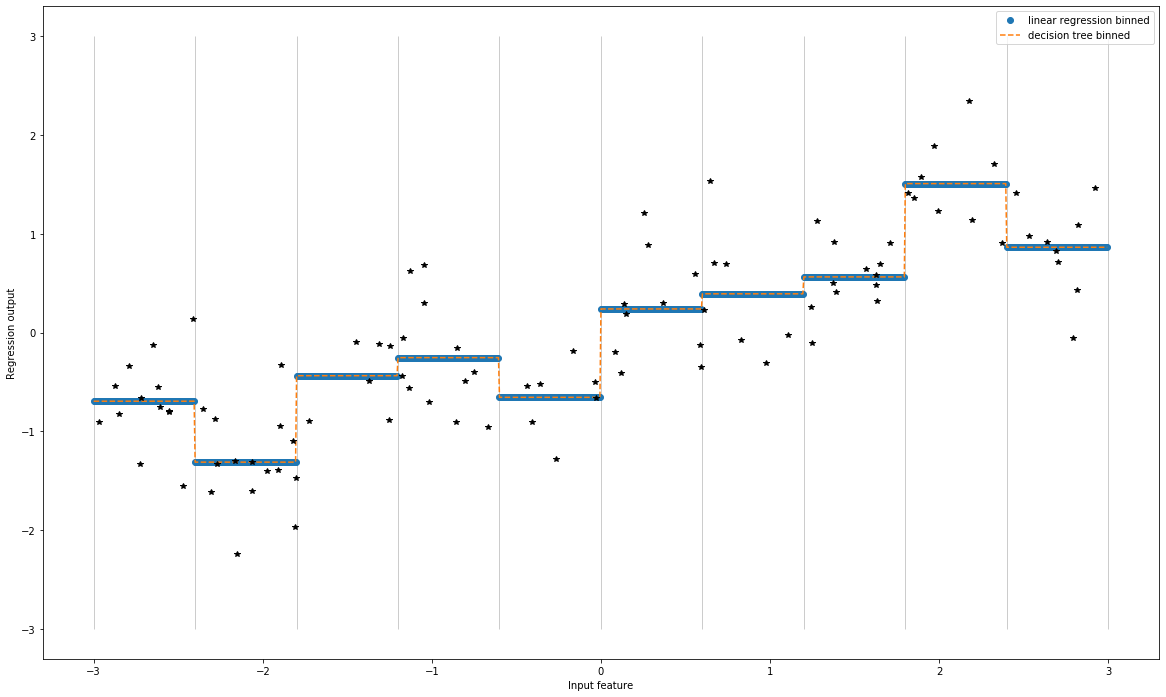

In [7]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
plt.figure(figsize=(20, 12))

linreg = LinearRegression().fit(X_binned, y)
plt.plot(line, linreg.predict(line_binned), 'o', label='linear regression binned')

tree = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, tree.predict(line_binned), '--',label='decision tree binned')

plt.plot(X[:, 0], y, '*', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')

# Linear model --> more flexible